In [6]:
# Python program to read
# json file

import os, json
import pandas as pd

path_to_json = 'results/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)  # for me this prints ['foo.json']


# Opening JSON file


['2021-09-06-13-05-12 - Martin Büßemeyer.json', '2021-09-06-15-15-57 - Tobias Markus.json', '2021-09-06-16-18-00 - Dominik Meier.json', '2021-09-06-17-11-22 - Joana Bergsiek.json', '2021-11-28-19-40-13 - William Lamm.json']


In [7]:


def leveltimes(file):
    file = json.load(file)
    i=0
    lvlCode = None
    levelLengths = []
    start = 0
    end = 0
    ignore = False
    for event in file:
        i+=1
        if(event["name"]=="GameStartEvent"):
            lvlCode = event["levelCode"]
            print(event["name"])
        if(event["name"]=="LevelChangedEvent"):
            start = event["createdAt"]
            if(event["levelName"]=="LevelTraining(Clone)" or event["levelName"]=="Level1(Clone)"):
                ignore=True
            
        if(event["name"]=="LevelCompletedEvent"):
            end = event["createdAt"]
            if(not ignore):
                levelLengths.append(end-start)
            ignore = False
            end = 0
            start = 0
    if(len(levelLengths)>6):
        return "error, list too long"   
    if(lvlCode==None):
        print("error no level code was found")
        return None
    print(lvlCode,levelLengths)
    levelLengths.append(lvlCode)
    return levelLengths

#leveltimes(file)

In [8]:
import pandas as pd

frame = pd.DataFrame(columns=["Level_1","Level_2","Level_3","Level_4","Level_5","Level_6","Condition"])
for i in json_files:
    file = open("./results/"+i)
    lis = leveltimes(file)
    print(lis)
    ser = pd.Series(lis,index=frame.columns)
    frame=frame.append(ser,ignore_index=True)

print(frame)


GameStartEvent
1aaa [175.1597, 78.6449, 66.07500000000005, 22.644999999999982, 191.68200000000002, 171.789]
[175.1597, 78.6449, 66.07500000000005, 22.644999999999982, 191.68200000000002, 171.789, '1aaa']
GameStartEvent
2bbb [16.66149999999999, 86.19530000000003, 89.75999999999993, 20.865999999999985, 19.052999999999997, 62.266999999999825]
[16.66149999999999, 86.19530000000003, 89.75999999999993, 20.865999999999985, 19.052999999999997, 62.266999999999825, '2bbb']
GameStartEvent
1bbb [73.42359999999996, 358.8229, 276.486, 89.21100000000001, 101.55300000000011, 45.92899999999986]
[73.42359999999996, 358.8229, 276.486, 89.21100000000001, 101.55300000000011, 45.92899999999986, '1bbb']
GameStartEvent
2aaa [41.594799999999964, 34.315300000000036, 49.269499999999994, 48.49940000000004, 68.1413, 247.32049999999992]
[41.594799999999964, 34.315300000000036, 49.269499999999994, 48.49940000000004, 68.1413, 247.32049999999992, '2aaa']
GameStartEvent
1aaa [52.07130000000001, 52.49959999999999, 308.6

In [9]:

#Average Time per level

#Average Time (Level 1-3) compared to (Level 4-6) (learning effect)

#Average Time Condition 1 vs Condition 2

0    117.665933
1     49.133800
2    157.570917
3     81.523467
4     92.791783
dtype: float64 0    28.825024
1    14.088881
2    52.280950
3    33.477134
4    43.764607
dtype: float64


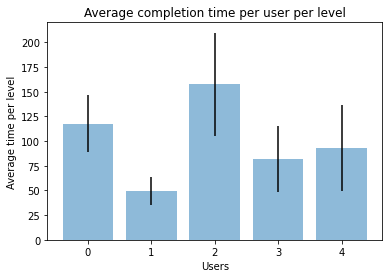

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#Average Time per user, pd mean on a row

row_averages=frame.mean(axis=1)
row_errors=frame.sem(axis=1)
print(row_averages,row_errors)


plt.bar(list(range(len(frame))),row_averages,yerr=row_errors,alpha=0.5,align="center")
plt.title("Average completion time per user per level")
plt.xlabel("Users")
plt.ylabel("Average time per level")
plt.show()
plt.savefig("av_per_users.png")


[71.78217999999998, 122.09559999999999, 158.0531, 39.549479999999996, 87.89702000000003, 119.04569999999993] [27.411395409818162, 59.90225109290969, 55.529766152127806, 13.622191705096514, 29.085573225336308, 38.99979683139389]


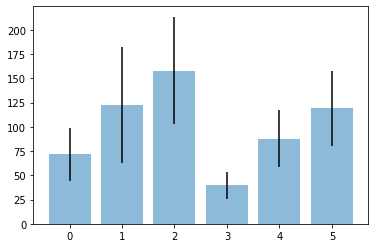

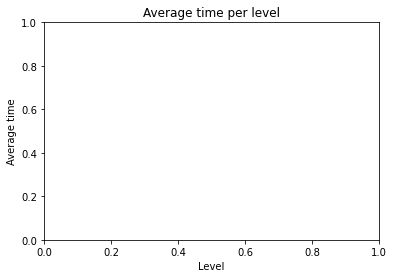

In [11]:
import matplotlib.pyplot as plt
import numpy as np
#Average Time per user, pd mean on a row

row_averages=frame.mean(axis=0).to_list()
row_errors=frame.sem(axis=0).to_list()
print(row_averages,row_errors)


plt.bar(list(range(len(frame.columns)-1)),row_averages,yerr=row_errors,alpha=0.5,align="center")
plt.title("Average time per level")
plt.xlabel("Level")
plt.ylabel("Average time")
plt.savefig("av_per_lvl.png")
plt.show()


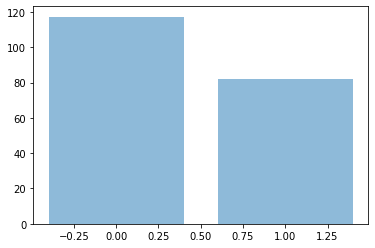

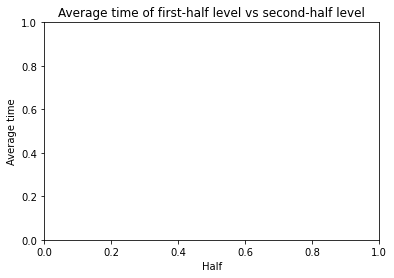

In [12]:

#LEARNING EFFECT mean mean learning effect
r1=frame.iloc[:,0:3].mean().mean()
r2=frame.iloc[:,3:-1].mean().mean()

r = [r1,r2]
plt.bar(list(range(2)),r,alpha=0.5,align="center")
plt.title("Average time of first-half level vs second-half level")
plt.xlabel("Half")
plt.ylabel("Average time")
plt.savefig("learning.png")
plt.show()
